In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pd.set_option('display.max_columns', None)
#pd.set_option("max_rows", None)
import json

In [20]:
 def game_event_to_panda_df(year):
        path = '/Users/macbook/Documents/Cours Automne_2021/IFT 6758 Data Science/milstone_data/'
        df = pd.read_json(path+str(year)+'02.json')        
        elementToRetrive = ['matchId',
                            'event',
                            'period',
                            'teamId',
                            'teamName',
                            'teamLink',
                            'teamTriCode',
                            'coordX',
                            'coordY',
                            'shooterName',
                            'goalieName',
                            'strength',
                            'shotSecondaryType']

        data = dict(zip(elementToRetrive, [[] for i in range(len(elementToRetrive))]))

        for game,ID in zip(df['liveData'],df['gamePk']):
            for play in game['plays']['allPlays']:
                if play['result']['event'] in ["Shot", "Goal"]:
                    data['matchId'].append(ID)
                    data['event'].append(play['result']['event'])
                    data['period'].append(play['about']['periodTime'])
                    data['teamId'].append(play['team']['id'])
                    data['teamName'].append(play['team']['name'])
                    data['teamLink'].append(play['team']['link'])
                    data['teamTriCode'].append(play['team']['triCode'])
                    data['coordX'].append(play['coordinates']['x'] if 'x' in play['coordinates'].keys() else np.nan)
                    data['coordY'].append(play['coordinates']['y'] if 'y' in play['coordinates'].keys() else np.nan)
                    if len(play['players']) == 2:
                        player0Type = play['players'][0]['playerType']
                        data['shooterName' if player0Type == "Shooter" else 'goalieName'].append(play['players'][0]['player']['fullName'])
                        data['goalieName' if player0Type == "Shooter" else 'shooterName'].append(play['players'][1]['player']['fullName'])
                    else:
                        data['shooterName'].append(play['players'][0]['player']['fullName'])
                        data['goalieName'].append(play['players'][len(play['players'])-1]['player']['fullName'])
                    if play['result']['event'] == "Goal":
                        data['strength'].append(play['result']['strength']['name'])
                    else:
                        data['strength'].append(None)
                    data['shotSecondaryType'].append(play['result']['secondaryType'] if 'secondaryType' in play['result'].keys() else np.nan)

        for column in data.items():
            column = pd.Series(column)

        return pd.DataFrame(data)

In [21]:
df = game_event_to_panda_df(2018)

In [22]:
df.head(10)

,matchId,event,period,teamId,teamName,teamLink,teamTriCode,coordX,coordY,shooterName,goalieName,strength,shotSecondaryType
0,2018020001,Shot,00:29,8,Montréal Canadiens,/api/v1/teams/8,MTL,78.0,-19.0,Artturi Lehkonen,Frederik Andersen,None,Backhand
1,2018020001,Shot,00:49,10,Toronto Maple Leafs,/api/v1/teams/10,TOR,-37.0,-10.0,Morgan Rielly,Carey Price,None,Snap Shot
2,2018020001,Shot,01:00,8,Montréal Canadiens,/api/v1/teams/8,MTL,47.0,-23.0,Brendan Gallagher,Frederik Andersen,None,Wrist Shot
3,2018020001,Shot,03:54,8,Montréal Canadiens,/api/v1/teams/8,MTL,53.0,14.0,Brendan Gallagher,Frederik Andersen,None,Snap Shot
4,2018020001,Shot,04:06,8,Montréal Canadiens,/api/v1/teams/8,MTL,77.0,-2.0,Mike Reilly,Frederik Andersen,None,Snap Shot
5,2018020001,Shot,04:06,8,Montréal Canadiens,/api/v1/teams/8,MTL,80.0,1.0,Phillip Danault,Frederik Andersen,None,Backhand
6,2018020001,Shot,06:14,8,Montréal Canadiens,/api/v1/teams/8,MTL,74.0,14.0,Max Domi,Frederik Andersen,None,Snap Shot
7,2018020001,Goal,09:34,8,Montréal Canadiens,/api/v1/teams/8,MTL,87.0,-3.0,Artturi Lehkonen,Frederik Andersen,Even,Wrap-around
8,2018020001,Shot,09:52,10,Toronto Maple Leafs,/api/v1/teams/10,TOR,-51.0,18.0,Zach Hyman,Carey Price,None,Slap Shot
9,2018020001,Shot,10:05,10,Toronto Maple Leafs,/api/v1/teams/10,TOR,-77.0,-7.0,Zach Hyman,Carey Price,None,Tip-In


In [23]:
print(df[df['event']=="Goal"]['coordX'].mean())
print(df[df['event']=="Goal"]['coordY'].mean())

-0.0362020097912909
-0.04353426069036579


In [24]:
print(df[df['event']=="Shot"]['coordX'].mean())
print(df[df['event']=="Shot"]['coordY'].mean())

-0.12854647724615956
-0.21025415337220815


In [59]:
goal = df[df['event']=="Goal"]['shotSecondaryType'].value_counts().rename_axis('shottype').reset_index(name='counts')
shot = df[df['event']=="Shot"]['shotSecondaryType'].value_counts().rename_axis('shottype').reset_index(name='counts')
goal

,shottype,counts
0,Wrist Shot,4043
1,Snap Shot,1166
2,Backhand,778
3,Slap Shot,744
4,Tip-In,719
5,Deflected,250
6,Wrap-around,59


In [57]:
shot

,shottype,counts
0,Wrist Shot,40390
1,Slap Shot,10869
2,Snap Shot,10140
3,Backhand,5781
4,Tip-In,3470
5,Deflected,1291
6,Wrap-around,770


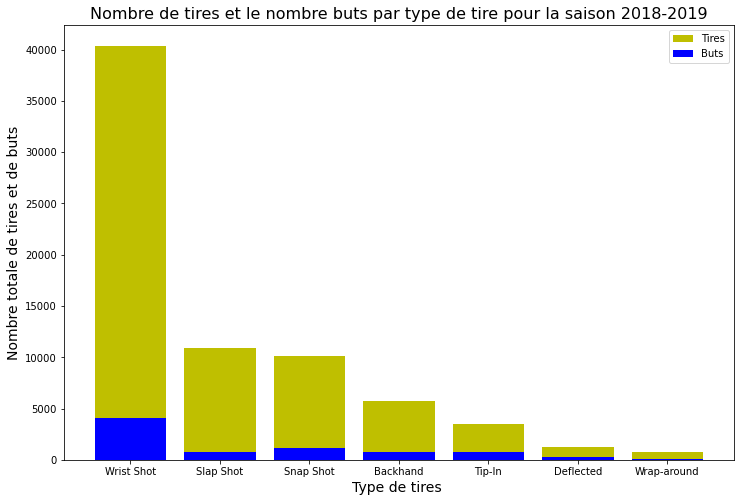

In [58]:
type=['Tires','Buts']
plt.bar(shot['shottype'], shot['counts'],color='y')
plt.bar(goal['shottype'],goal['counts'],color='b')
plt.xlabel("Type de tires ",fontsize=14)
plt.ylabel("Nombre totale de tires et de buts",fontsize=14)
plt.rcParams['figure.figsize'] = [12, 8]
plt.legend(type,loc=1,)
plt.title("Nombre de tires et le nombre buts par type de tire pour la saison 2018-2019",fontsize=16)
plt.show()